In [1]:
# WIP

In [2]:
# V 1.14
# Standard Imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

output_notebook()
%matplotlib inline

from bokeh.layouts import layout, widgetbox
from bokeh.models import ColumnDataSource, HoverTool, BoxZoomTool, ResetTool, PanTool
from bokeh.models.widgets import Slider, Select, TextInput, Div
from bokeh.models import WheelZoomTool, SaveTool, LassoSelectTool
from bokeh.io import curdoc
from functools import lru_cache
import bokeh

# Pandas Setup
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour Management
MC = '#242a49'  # Main
SC = '#ededed'  # Secondary
TC = 'red'  # Tertiary 

colors = ['#202540', '#17b5ff', 'red', 'pink', '#443857', '#bed6f7', '#144c4a']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])
cmap2 = mcolors.LinearSegmentedColormap.from_list('n', ['white', MC])
boxplot_params = dict(
    patch_artist=True,
    boxprops=dict(facecolor=SC, color=MC),
    capprops=dict(color=MC, linewidth=2),
    whiskerprops=dict(color=MC),
    flierprops=dict(color=MC, markeredgecolor=MC),
    medianprops=dict(color='red', linewidth=2),
)

#Pyplot Setup
plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
    'axes.formatter.useoffset': False,  # Scientific notation
    'grid.color': SC,
    'figure.frameon': False,
})

Loading BokehJS ...

In [3]:
# Additional imports
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize

In [4]:
# Used Versions
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)
print('Bokeh', bokeh.__version__)

Pandas: 0.23.4
Numpy: 1.14.3
Matplotlib 2.2.3
Seaborn 0.9.0
Bokeh 0.12.10


In [5]:
df = pd.read_csv(
    ZipFile('data/youtube-us.zip').open('USvideos.csv'), parse_dates=['trending_date', 'publish_time'])

df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null datetime64[ns]
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), datetime64[ns](1), int64(5), object(7)
memory usage: 4.2+ MB


In [7]:
df.shape

(40949, 16)

In [8]:
old_cols = df.columns

In [9]:
old_cols

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [10]:
# Changing columns to 'camel case'
new_cols = []
for col in old_cols:
    col = col.replace('_', ' ')
    col = col.replace('.', ' ')
    col = col.title()
    col = col.replace(' ', '')
    new_cols.append(col)
new_cols

['VideoId',
 'TrendingDate',
 'Title',
 'ChannelTitle',
 'CategoryId',
 'PublishTime',
 'Tags',
 'Views',
 'Likes',
 'Dislikes',
 'CommentCount',
 'ThumbnailLink',
 'CommentsDisabled',
 'RatingsDisabled',
 'VideoErrorOrRemoved',
 'Description']

In [11]:
df.columns = new_cols

In [12]:
df.head(2)

,VideoId,TrendingDate,Title,ChannelTitle,CategoryId,PublishTime,Tags,Views,Likes,Dislikes,CommentCount,ThumbnailLink,CommentsDisabled,RatingsDisabled,VideoErrorOrRemoved,Description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
VideoId                40949 non-null object
TrendingDate           40949 non-null object
Title                  40949 non-null object
ChannelTitle           40949 non-null object
CategoryId             40949 non-null int64
PublishTime            40949 non-null datetime64[ns]
Tags                   40949 non-null object
Views                  40949 non-null int64
Likes                  40949 non-null int64
Dislikes               40949 non-null int64
CommentCount           40949 non-null int64
ThumbnailLink          40949 non-null object
CommentsDisabled       40949 non-null bool
RatingsDisabled        40949 non-null bool
VideoErrorOrRemoved    40949 non-null bool
Description            40379 non-null object
dtypes: bool(3), datetime64[ns](1), int64(5), object(7)
memory usage: 4.2+ MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CategoryId,"40,949.00",19.97,7.57,1.00,17.00,24.00,25.00,43.00
Views,"40,949.00","2,360,784.64","7,394,113.76",549.00,"242,329.00","681,861.00","1,823,157.00","225,211,923.00"
Likes,"40,949.00","74,266.70","228,885.34",0.00,"5,424.00","18,091.00","55,417.00","5,613,827.00"
Dislikes,"40,949.00","3,711.40","29,029.71",0.00,202.00,631.00,"1,938.00","1,674,420.00"
CommentCount,"40,949.00","8,446.80","37,430.49",0.00,614.00,"1,856.00","5,755.00","1,361,580.00"


In [15]:
categories = """
2 - Autos & Vehicles
1 -  Film & Animation
10 - Music
15 - Pets & Animals
17 - Sports
18 - Short Movies
19 - Travel & Events
20 - Gaming
21 - Videoblogging
22 - People & Blogs
23 - Comedy
24 - Entertainment
25 - News & Politics
26 - Howto & Style
27 - Education
28 - Science & Technology
29 - Nonprofits & Activism
30 - Movies
31 - Anime/Animation
32 - Action/Adventure
33 - Classics
34 - Comedy
35 - Documentary
36 - Drama
37 - Family
38 - Foreign
39 - Horror
40 - Sci-Fi/Fantasy
41 - Thriller
42 - Shorts
43 - Shows
44 - Trailers
"""


categories_dict = {}
for line in categories.split('\n')[1:-1]:
    num, desc = (line.split('-', 1))
    num = int(num)
    desc = desc.strip()
    categories_dict[num] = desc 

df['Category'] = df.CategoryId.apply(lambda x: categories_dict.get(x, x))

In [16]:
# Date format '17.14.11' yy.mm.dd

df.TrendingDate = df.TrendingDate.apply(lambda x: pd.to_datetime('20' + x, format='%Y.%d.%m') )

In [17]:
# New features:
df['PercentageLikes'] = df.Likes / df.Views * 100

df_wo_duplicates = df.sort_values(by=['Views']).drop_duplicates(subset=['Title'])

In [18]:
df.head()

,VideoId,TrendingDate,Title,ChannelTitle,CategoryId,PublishTime,Tags,Views,Likes,Dislikes,CommentCount,ThumbnailLink,CommentsDisabled,RatingsDisabled,VideoErrorOrRemoved,Description,Category,PercentageLikes
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,7.69
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,4.02
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,4.58
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,2.96
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.31


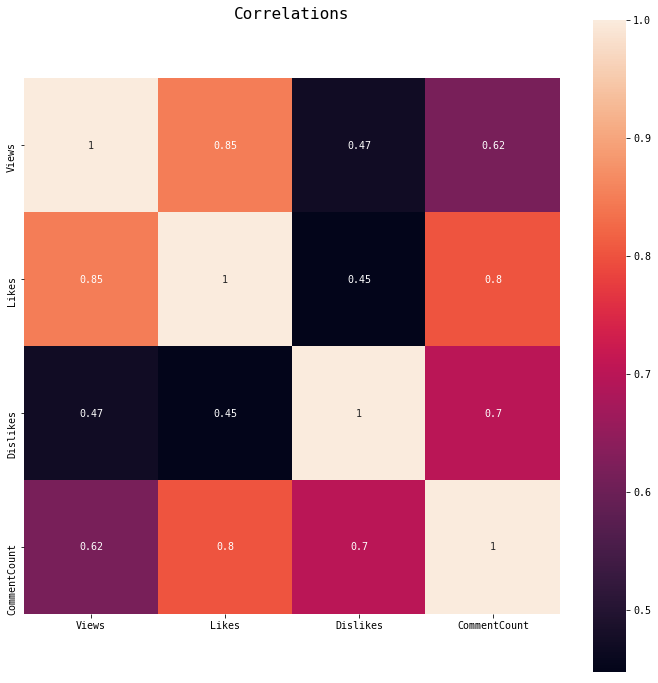

In [19]:
cols = ['Views', 'Likes', 'Dislikes', 'CommentCount']
plt.figure(figsize=(12, 12))
sns.heatmap(df[cols].corr(), square=True, annot=True)
plt.title('Correlations', y=1.1);

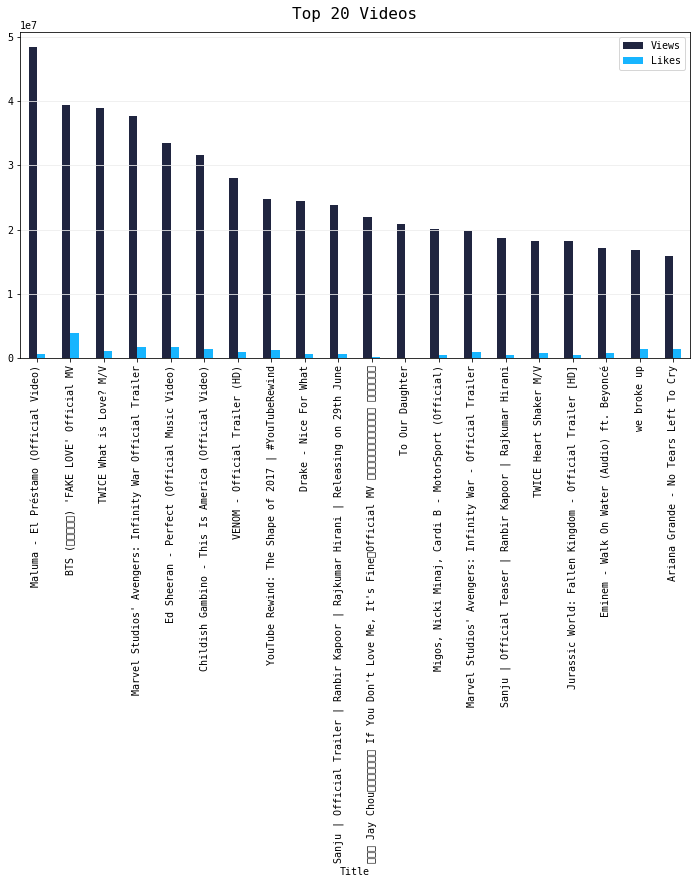

In [20]:
df_wo_duplicates = df.sort_values(by=['Views']).drop_duplicates(subset=['Title'])
top_num = 20
top_idxs = df_wo_duplicates.Views.sort_values(ascending=False)[:top_num].index

df.loc[top_idxs, ['Title', 'Views', 'Likes']].set_index('Title').plot(kind='bar',
                                                                     color=colors)
plt.title('Top {} Videos'.format(top_num), y=1.02)
plt.grid(axis='y')

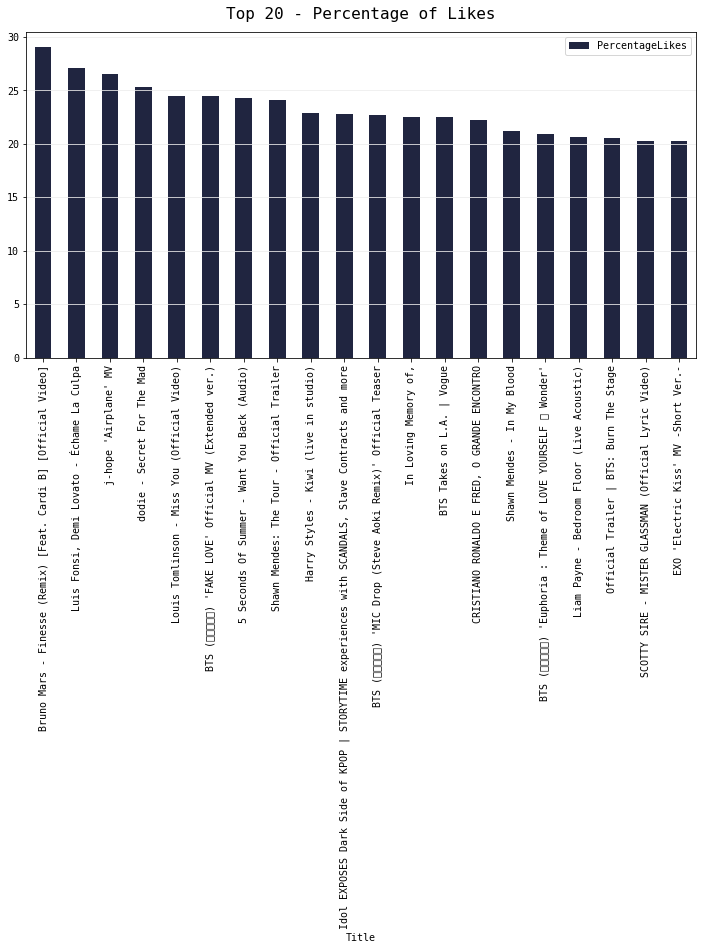

In [21]:
df_wo_duplicates = df.sort_values(by=['Views']).drop_duplicates(subset=['Title'])
top_num = 20
top_idxs = df_wo_duplicates.PercentageLikes.sort_values(ascending=False)[:top_num].index

df.loc[top_idxs, ['Title', 'PercentageLikes']].set_index('Title').plot(kind='bar',
                                                                     color=colors)
plt.title('Top {} - Percentage of Likes'.format(top_num), y=1.02)
plt.grid(axis='y')

In [22]:
df.head()

,VideoId,TrendingDate,Title,ChannelTitle,CategoryId,PublishTime,Tags,Views,Likes,Dislikes,CommentCount,ThumbnailLink,CommentsDisabled,RatingsDisabled,VideoErrorOrRemoved,Description,Category,PercentageLikes
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,7.69
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,4.02
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,4.58
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,2.96
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.31


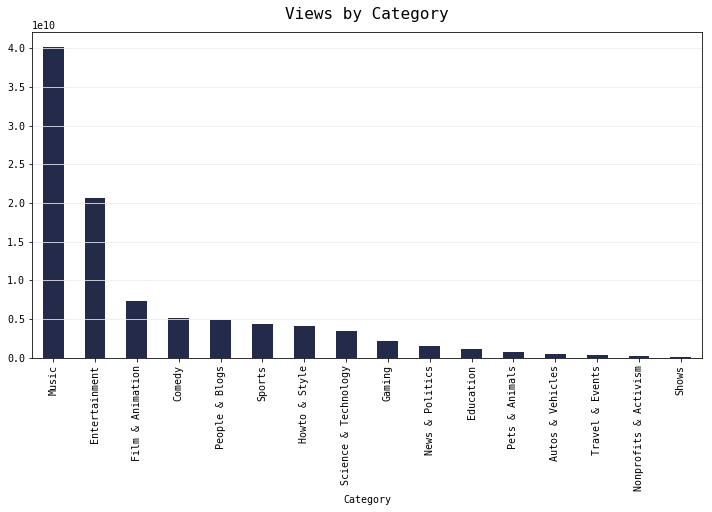

In [33]:
df.groupby('Category').Views.sum().sort_values(ascending=False).plot(kind='bar', color=MC)
plt.title('Views by Category', y=1.02);
plt.grid(axis='y')

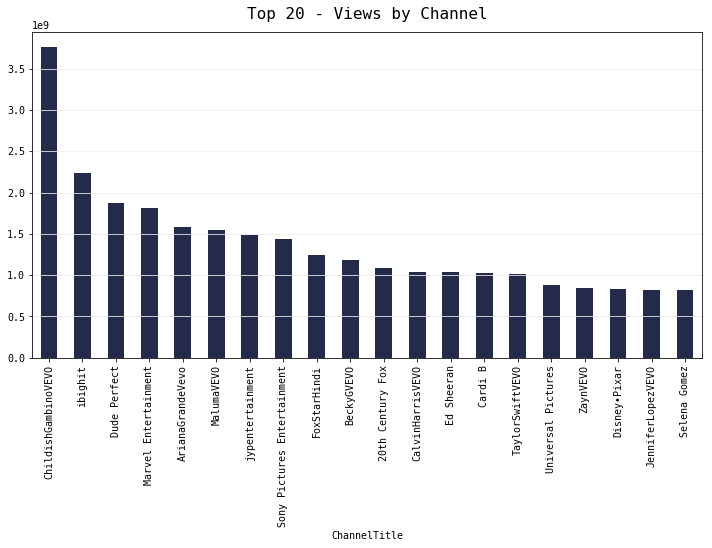

In [36]:
top_num = 20
df.groupby('ChannelTitle').Views.sum().sort_values(ascending=False)[:20].plot(kind='bar', color=MC)
plt.title('Top {} - Views by Channel'.format(top_num), y=1.02);
plt.grid(axis='y')

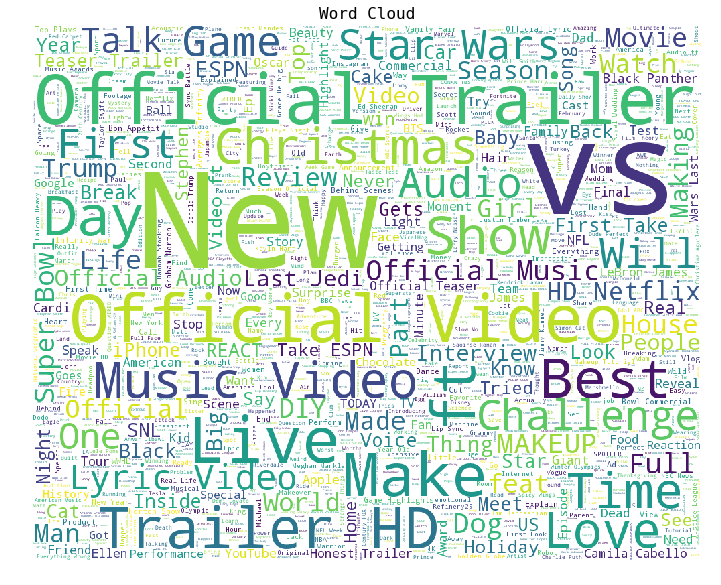

In [37]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200,
    width=1000,
    height=800,
    random_state=1944
).generate(' '.join(df_wo_duplicates['Title'].dropna().astype(str)))
fig = plt.figure(figsize=(12, 14))
plt.imshow(wordcloud)
plt.title('Title - Word Cloud')
plt.axis('off')
plt.show()

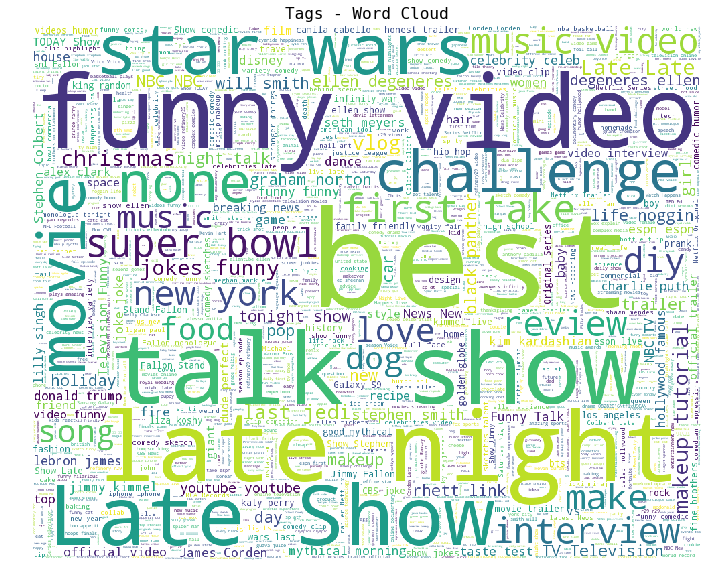

In [39]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200,
    width=1000,
    height=800,
    random_state=1944
).generate(' '.join(df_wo_duplicates['Tags'].dropna().astype(str)))
fig = plt.figure(figsize=(12, 14))
plt.imshow(wordcloud)
plt.title('Tags - Word Cloud')
plt.axis('off')
plt.show()

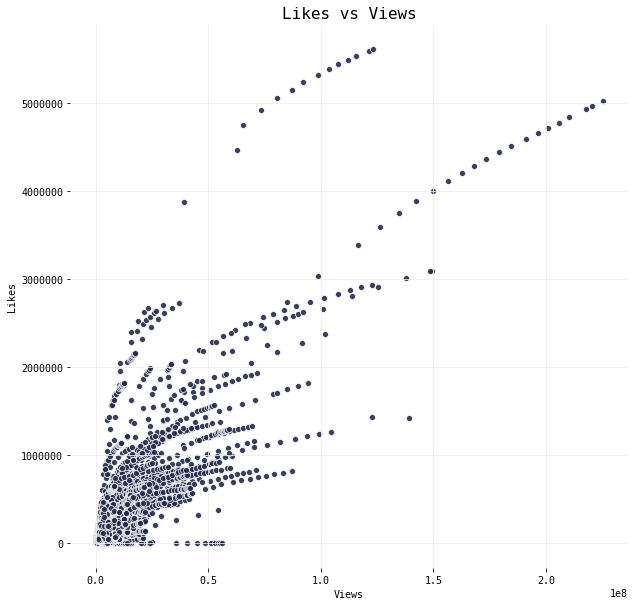

In [52]:
plt.figure(figsize=(10, 10))
plt.axes(frameon=False)
sns.scatterplot(df.Views, df.Likes, color=MC, alpha=.9)
plt.grid()
plt.title('Likes vs Views');

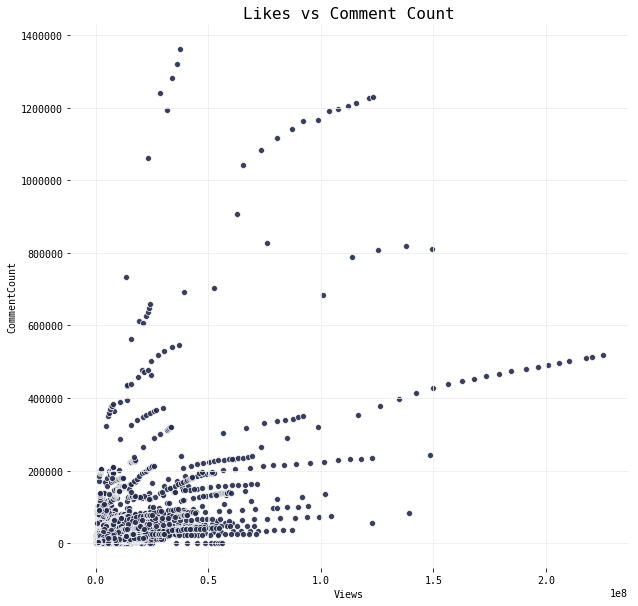

In [54]:
plt.figure(figsize=(10, 10))
plt.axes(frameon=False)
sns.scatterplot(df.Views, df.CommentCount, color=MC, alpha=.9)
plt.grid()
plt.title('Likes vs Comment Count');

In [ ]:
# title bigrams

In [55]:
# sentiment analysis

In [57]:
# lenght of title - histo

In [ ]:
# how much time passes between launch and trending